In [281]:
import tensorflow as tf
from tensorflow import keras
#import tensorflow.keras.models
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout
#from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [95]:
model_n = len(glob.glob('IDL data/fl_???_000_d.csv'));
loop_n = [];
loops = np.empty(0);

for i in range(model_n):
    loop_i = len(glob.glob('IDL data/fl_'+str(i).zfill(3)+'_???_d.csv'));
    loop_n.append(loop_i);

In [385]:
m = sum(loop_n); # 205

loop_dataX = [];#np.zeros((m,350));
loop_dataY = [];#np.empty((0,2));#np.zeros((205,2));

for i in range(model_n):
    for j in range(loop_n[i]):
        loop_j = pd.read_csv('IDL data/fl_'+str(i).zfill(3)+'_'+str(j).zfill(3)+'_d.csv', header=None).values;
        if i!=2:
            loop_dataX = np.append(loop_dataX, loop_j[:350,:61]);
        else:
            loop_dataX = np.append(loop_dataX, loop_j[:350,3:64]);
        loop_j = pd.read_csv('IDL data/fl_'+str(i).zfill(3)+'_'+str(j).zfill(3)+'_alpha_h.csv', header=None).values;
        loop_dataY = np.append(loop_dataY, loop_j.T[0]);
        
loop_dataX = loop_dataX.reshape(m,21350)
loop_dataY = loop_dataY.reshape(m,2)

# Recast Labels as One-Hot format
loop_onehotY = np.zeros((205,350*61));
for i in range(loop_dataY.shape[0]):
    loop_onehotY[i,int(loop_dataY[i,0]+loop_dataY[i,1]*61)] = 1;

In [395]:
loop_onehotY[0]

array([0., 0., 0., ..., 0., 0., 0.])

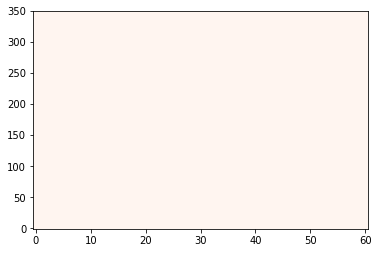

In [396]:
plt.imshow(200*loop_onehotY[1].reshape(350, 61), cmap='Reds', aspect='auto', origin='lower')

In [384]:
foo = np.zeros((2,3*5));
bar = np.array([[0.,2.],[1,4]]);
for i in range(foo.shape[0]):
    foo[i,int(bar[i,0]*5+bar[i,1])] = 1;
foo.reshape(2,3,5)

array([[[0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.]]])

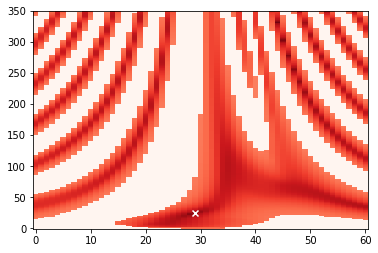

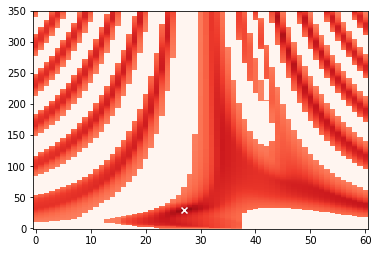

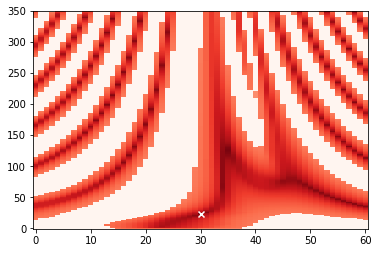

In [279]:
for n in range(3):
    plt.imshow(np.sqrt(np.sqrt(loop_dataX[n].reshape(350,61))), cmap='Reds_r', aspect='auto', origin='lower')
    plt.scatter(loop_dataY[n,0], loop_dataY[n,1], c='White', marker='x')
    plt.show()

In [362]:
loop_dataX.shape, loop_onehotY.shape

((205, 21350), (205, 61))

In [370]:
model = keras.Sequential([
    keras.layers.Dense(61, activation='relu', input_shape=(21350,)),
    keras.layers.Dense(61, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [371]:
fithist = model.fit(loop_dataX[:145], loop_onehotY[:145], epochs=30)

Train on 146 samples
Epoch 1/30
146/146 [==============================] - 0s 3ms/sample - loss: 0.9798 - accuracy: 0.7102
Epoch 2/30
146/146 [==============================] - 0s 615us/sample - loss: 0.6068 - accuracy: 0.7896
Epoch 3/30
146/146 [==============================] - 0s 611us/sample - loss: 0.3661 - accuracy: 0.8610
Epoch 4/30
146/146 [==============================] - 0s 690us/sample - loss: 0.2938 - accuracy: 0.8705
Epoch 5/30
146/146 [==============================] - 0s 615us/sample - loss: 0.2100 - accuracy: 0.9169
Epoch 6/30
146/146 [==============================] - 0s 642us/sample - loss: 0.1585 - accuracy: 0.9646
Epoch 7/30
146/146 [==============================] - 0s 782us/sample - loss: 0.1213 - accuracy: 0.9774
Epoch 8/30
146/146 [==============================] - 0s 710us/sample - loss: 0.0918 - accuracy: 0.9835
Epoch 9/30
146/146 [==============================] - 0s 769us/sample - loss: 0.0733 - accuracy: 0.9836
Epoch 10/30
146/146 [========================

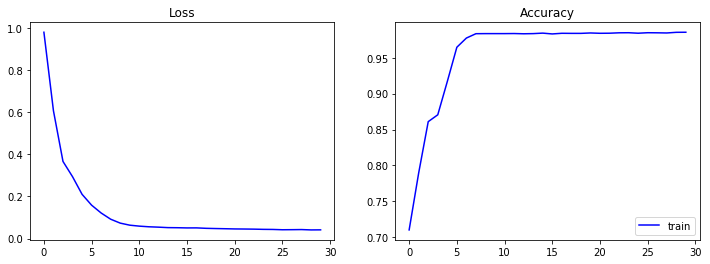

In [372]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(fithist.history['loss'], color='b')
#ax[0].plot(fithist.history['val_loss'], color='r')
ax[1].plot(fithist.history['accuracy'], color='b', label='train')
#ax[1].plot(fithist.history['val_accuracy'], color='r', label='validate')
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].legend();

In [373]:
model.evaluate(loop_dataX[145:], loop_onehotY[145:])

59/59 [==============================] - 0s 1ms/sample - loss: 0.0692 - accuracy: 0.9775


[0.06923786790694221, 0.97749376]